In [22]:
# Importing the Libraries to be used in the program

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
import missingno as msno
from sklearn.model_selection import StratifiedKFold

In [23]:
import warnings
warnings.filterwarnings('ignore')


In [24]:
#Loading the data to a variable using pandas library
#Path of the file to be modified when the program is run

loans = pd.read_csv('C:\python\loan_data.csv')

In [25]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [26]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [27]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


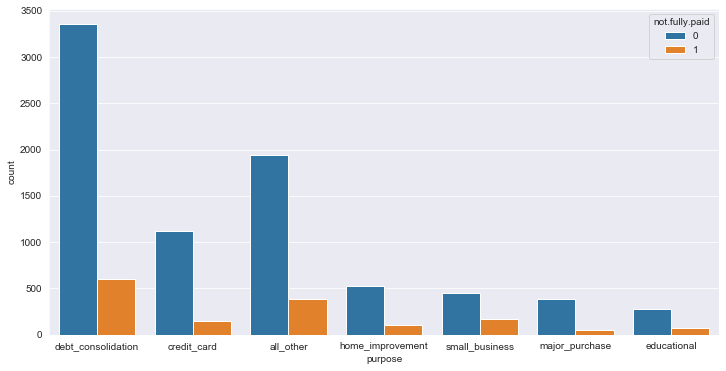

In [28]:
##countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid

plt.subplots(figsize = (12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loans)

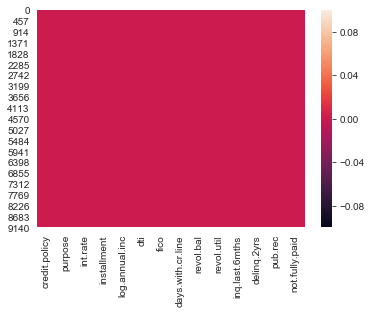

In [29]:
##printing heatmap to check nullvalues

sns.heatmap(loans.isnull(), cbar=True)

In [30]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [31]:
##the purpose column as categorical

##That means we need to transform them using dummy variables in sklearn.

cat_feats = ['purpose']

In [32]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [33]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [14]:
## Spliting data into training and testing Set

# from sklearn.model_selection import train_test_split

In [35]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state= 101)

In [36]:
## using SVM algorithm to build the classifier model
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')

In [40]:
# Using Stratified Cross Validation to Split the training and Test Set
# We are assuming a standard Split of 5

skf = StratifiedKFold(n_splits=5)

In [41]:
#Building the classifier model

scores_skf = []

for train_set, test_set in skf.split(X, y):
    svclassifier.fit(X.loc[train_set], y[train_set])
    accuracy_score = svclassifier.score(X.loc[test_set], y[test_set])
    scores_skf.append(accuracy_score)

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5


In [17]:
## using SVM algorithm
# from sklearn.svm import SVC
# svclassifier = SVC(kernel='rbf')
# svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
##Prediction and Evaluation using SVM 

#y_predict = svclassifier.predict(X_test)
y_predict = svclassifier.predict(X.loc[test_set])

In [46]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
##Printing confusion matrix for given dataset
from sklearn.metrics import confusion_matrix,classification_report
#print(confusion_matrix(y_test,y_predict))
print(confusion_matrix(y[test_set],y_predict))



[[1609    0]
 [ 306    0]]


In [49]:
##printing classification Report for given data set
#print(classification_report(y_test,y_predict))
print(classification_report(y[test_set],y_predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.00      0.00      0.00       306

    accuracy                           0.84      1915
   macro avg       0.42      0.50      0.46      1915
weighted avg       0.71      0.84      0.77      1915



In [65]:
# Computing the accuracy of the model with Stratified Cross Validation
print("SVM Model's Accuracy during respective fold of validation is : {} " .format(np.array(scores_skf)*100))

SVM Model's Accuracy during respective fold of validation is : [83.97703549 83.97703549 83.97703549 84.02088773 84.02088773] 
